In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let's try to find are there any NaN values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


There are no NaN-values. We see there are 3 columns with categorial data.

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

Color diamond colour, from J (worst) to D (best)

Clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Diamond masters gave us the criterions of quality for categorial columns. We can try to name the worst criterions with lowest values and the best criterions with highest values.

In [4]:
ndf = df.copy()
ndf['cut'] = ndf['cut'].replace({quality: idx for idx, quality in enumerate('Fair, Good, Very Good, Premium, Ideal'.split(', '))})
ndf['color'] = ndf['color'].replace({color: idx for idx, color in enumerate('DEFGHIJ'[::-1])})
ndf['clarity'] = ndf['clarity'].replace({clar: idx for idx, clar in enumerate('I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF'.split(', '))})
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


All categorial values were changed to integer values.

Now we will separate data to features and predictable values.

In [6]:
# ndf['volume'] = ndf.x * ndf.y * ndf.z
# ndf = ndf.drop(columns=['y', 'z'])
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

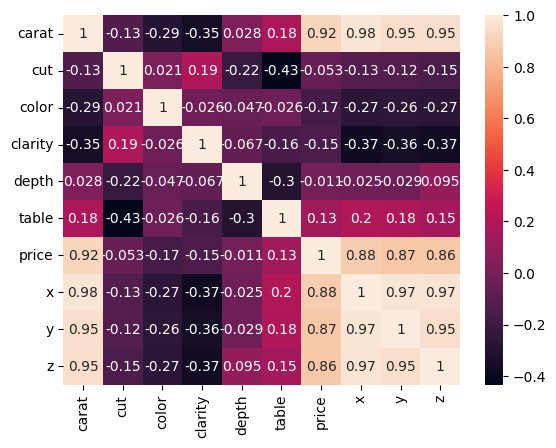

In [7]:
import seaborn as sns


sns.heatmap(ndf.corr(), annot=True)

In [8]:
X, y = ndf.drop(columns=['price']), ndf.price
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75


In [9]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=27)
Xtrain.shape

(40455, 9)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

In [11]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X=Xtrain, y=ytrain)
predict_lr = lr.predict(X=Xtest)
predict_lr

array([ 6507.01554119,  2777.48944064, 10282.48083563, ...,
       10338.39244404,  4681.69244392,  3717.0215111 ])

In [12]:
from sklearn.metrics import mean_squared_error as MSE


MSE(y_true=ytest, y_pred=predict_lr) ** 0.5

1250.4128322932906

In [13]:
lr.score(Xtest, ytest)

0.900538882582934

In [14]:
from sklearn.linear_model import LassoCV


lcv = LassoCV()
lcv.fit(Xtrain, ytrain)
predict_lcv = lcv.predict(Xtest)


MSE(ytest, predict_lcv) ** 0.5

1247.5776960145197

In [15]:
from sklearn.linear_model import Ridge


rr = Ridge(alpha=100)
rr.fit(Xtrain, ytrain)
predict_rr = rr.predict(Xtest)


MSE(ytest, predict_rr) ** 0.5

1245.7041444648057